In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Statistical Operations
from scipy import stats

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Model Evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Evaluation Metrics
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

# Hyperparameter Tuning
import time  # For measuring execution time
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.feature_selection import SelectFromModel

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concepts_of_AI/Final/Classification/smoker_status.csv')

# **Data Exploration**

In [ ]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,40.0,165.0,65.0,81.8,0.6,0.8,1.0,1.0,129.0,75.0,...,39.0,124.0,16.2,1.0,1.1,26.0,33.0,75.0,1.0,1.0
1,60.0,155.0,45.0,70.8,0.7,0.8,1.0,1.0,115.0,70.0,...,75.0,116.0,14.6,1.0,0.8,32.0,32.0,43.0,0.0,0.0
2,50.0,150.0,45.0,78.0,0.1,0.2,1.0,1.0,107.0,76.0,...,63.0,76.0,12.8,3.0,0.9,134.0,100.0,590.0,0.0,0.0
3,25.0,170.0,80.0,93.0,1.2,1.0,1.0,1.0,128.0,88.0,...,41.0,85.0,15.8,1.0,1.1,53.0,177.0,92.0,1.0,0.0
4,40.0,160.0,55.0,69.0,0.8,1.0,1.0,1.0,112.0,61.0,...,68.0,123.0,11.8,1.0,0.6,30.0,20.0,15.0,0.0,0.0


In [ ]:
df.tail()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
41903,60.0,145.0,55.0,72.0,0.2,0.8,1.0,1.0,125.0,77.0,...,82.0,150.0,13.7,1.0,0.8,25.0,15.0,11.0,0.0,0.0
41904,45.0,160.0,55.0,67.0,1.2,1.2,1.0,1.0,137.0,72.0,...,88.0,104.0,10.3,1.0,0.8,26.0,21.0,17.0,0.0,0.0
41905,25.0,175.0,70.0,83.5,1.5,1.5,1.0,1.0,114.0,76.0,...,62.0,84.0,15.1,1.0,0.7,58.0,84.0,142.0,1.0,0.0
41906,40.0,150.0,45.0,67.0,1.0,0.9,1.0,1.0,109.0,70.0,...,71.0,74.0,13.2,1.0,0.5,19.0,11.0,13.0,1.0,0.0
41907,20.0,165.0,65.0,74.0,1.2,1.2,1.0,1.0,120.0,80.0,...,70.0,78.0,13.6,1.0,1.0,23.0,23.0,14.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41908 entries, 0 to 41907
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41405 non-null  float64
 1   height(cm)           41407 non-null  float64
 2   weight(kg)           41417 non-null  float64
 3   waist(cm)            41395 non-null  float64
 4   eyesight(left)       41401 non-null  float64
 5   eyesight(right)      41397 non-null  float64
 6   hearing(left)        41403 non-null  float64
 7   hearing(right)       41409 non-null  float64
 8   systolic             41415 non-null  float64
 9   relaxation           41390 non-null  float64
 10  fasting blood sugar  41402 non-null  float64
 11  Cholesterol          41434 non-null  float64
 12  triglyceride         41419 non-null  float64
 13  HDL                  41411 non-null  float64
 14  LDL                  41389 non-null  float64
 15  hemoglobin           41391 non-null 

In [ ]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,41405.000000,41407.000000,41417.000000,41395.000000,41401.000000,41397.000000,41403.000000,41409.000000,41415.000000,41390.000000,...,41411.000000,41389.000000,41391.000000,41417.000000,41407.000000,41395.000000,41417.000000,41423.000000,41414.000000,41398.000000
mean,44.133438,164.690511,65.950938,82.083276,1.014550,1.008848,1.025385,1.026178,121.485380,76.005943,...,57.264785,115.066926,14.628939,1.086559,0.886309,26.211040,27.180771,40.031335,0.214855,0.367868
std,12.062714,9.180889,12.888096,9.330995,0.497802,0.499240,0.157292,0.159666,13.618016,9.655461,...,14.609613,42.390160,1.563395,0.402111,0.221321,18.904152,30.785146,50.088105,0.410727,0.482231
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                    503
height(cm)             501
weight(kg)             491
waist(cm)              513
eyesight(left)         507
eyesight(right)        511
hearing(left)          505
hearing(right)         499
systolic               493
relaxation             518
fasting blood sugar    506
Cholesterol            474
triglyceride           489
HDL                    497
LDL                    519
hemoglobin             517
Urine protein          491
serum creatinine       501
AST                    513
ALT                    491
Gtp                    485
dental caries          494
smoking                510
dtype: int64


In [ ]:
# Checking for duplicates
duplicates_before = df.duplicated().sum()
print("Duplicates rows before dropping: ",duplicates_before)

Duplicates rows before dropping:  7473


In [ ]:
df.shape

(41908, 23)

# **Data Visualization**

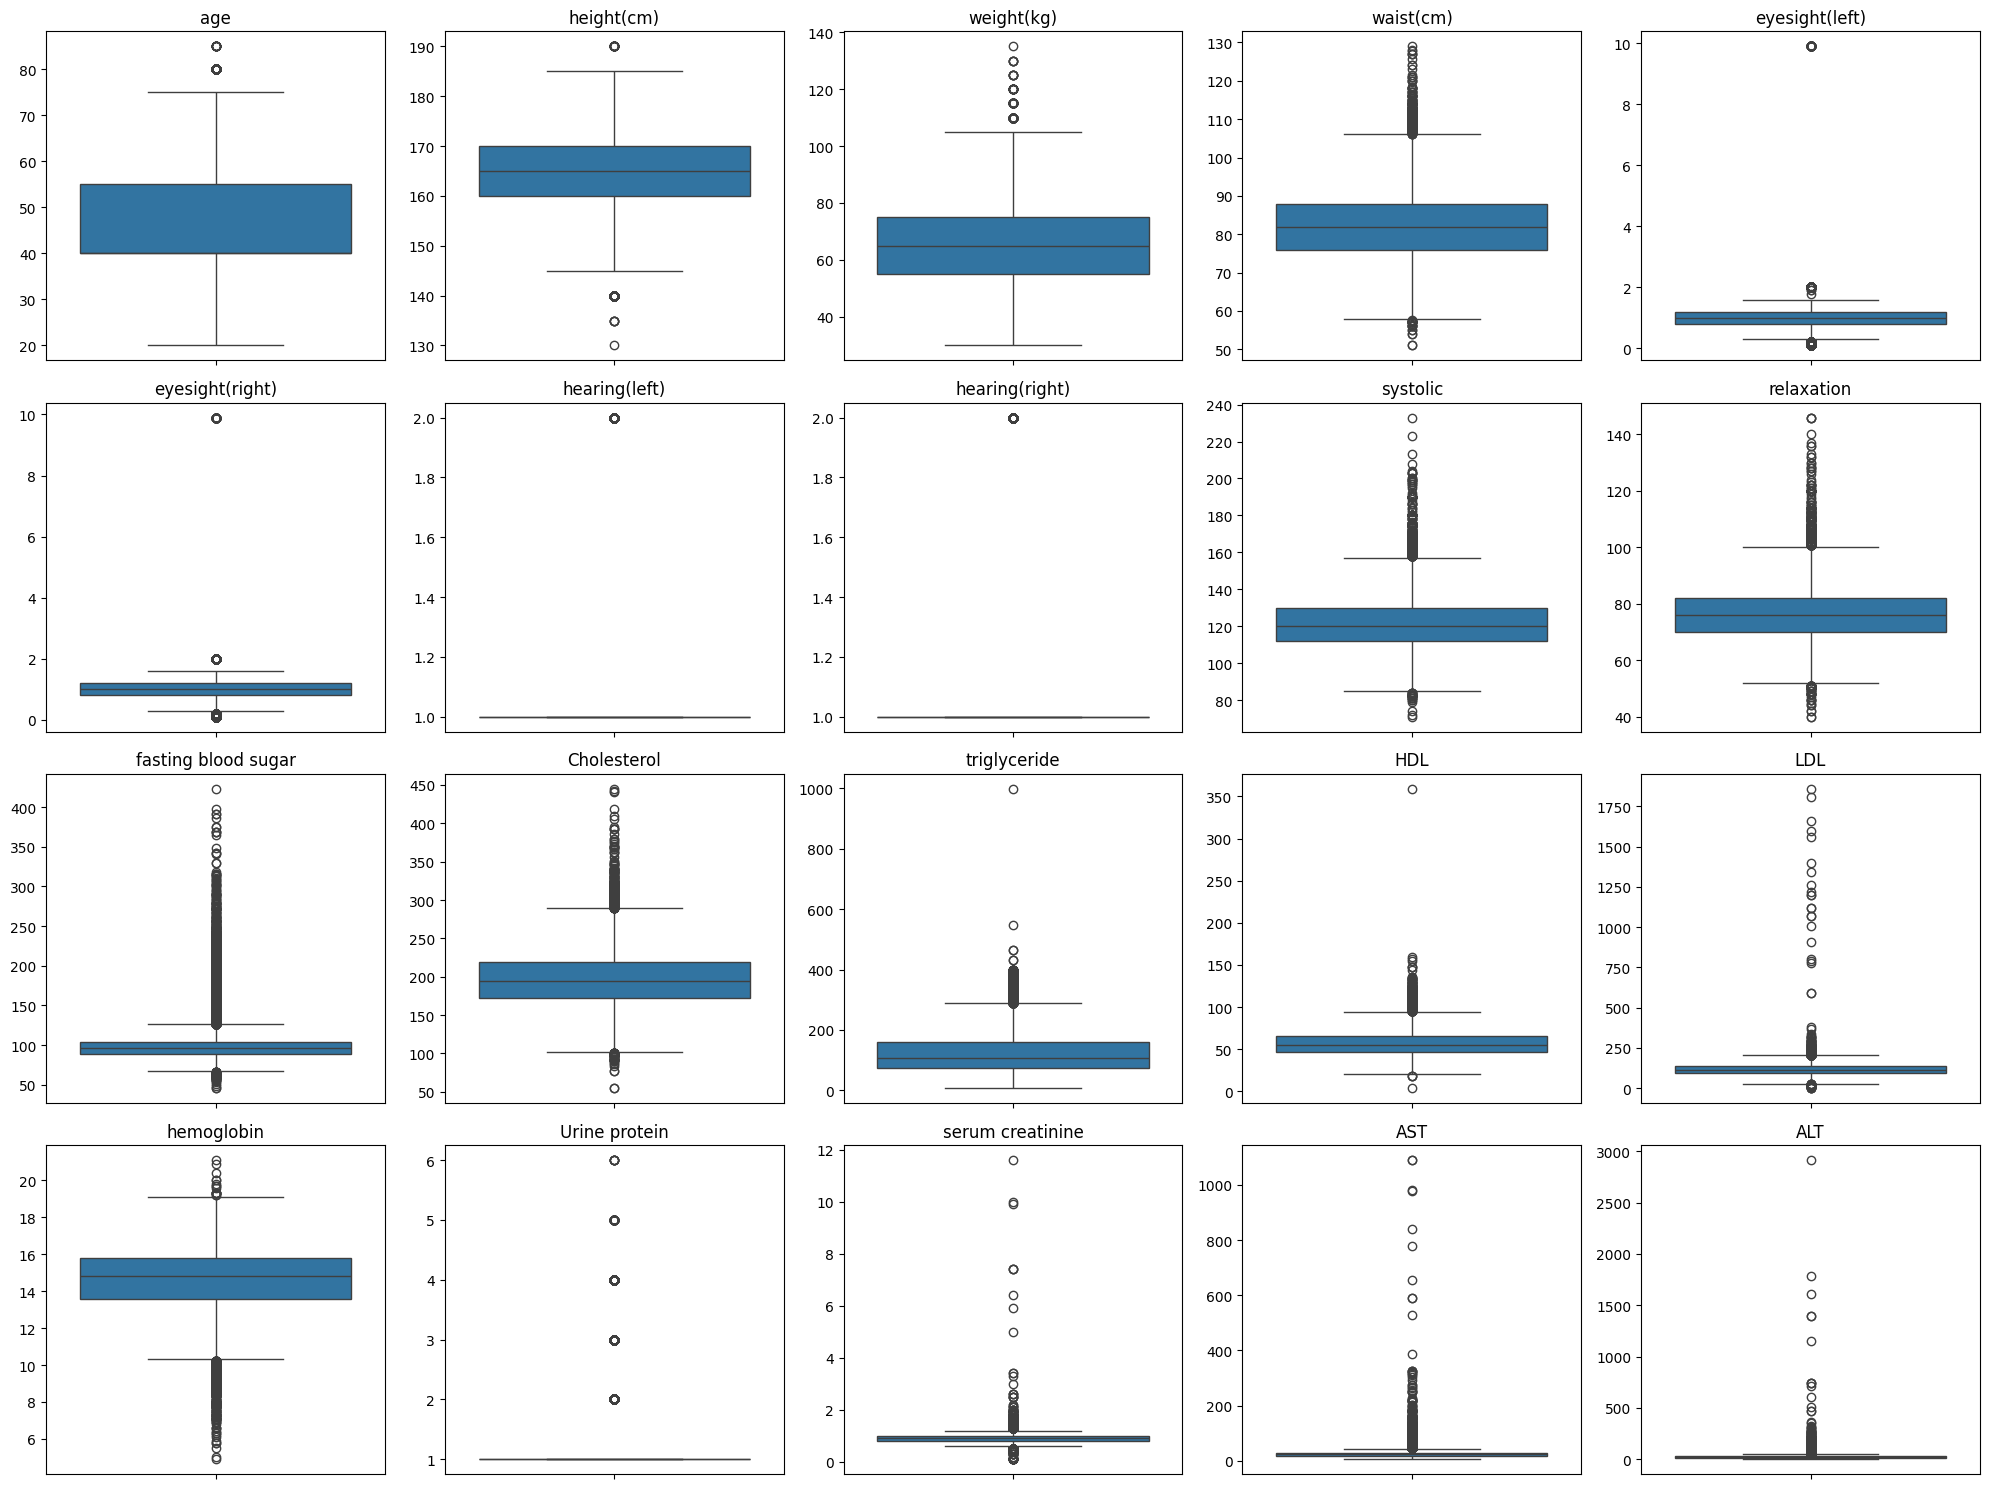

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplot
n_rows = 4
n_cols = 5

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.ravel()  # Ravel turns a matrix into a flat array, which makes it easier to iterate

# Plot a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    if i < len(axes):  # Check to make sure we don't go out of bounds
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_ylabel('')

# Hide any empty subplot areas
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
categorical_numeric_features = numeric_cols.loc[:, numeric_cols.nunique() <= 4]
non_categorical_numeric_features = numeric_cols.loc[:, numeric_cols.nunique() > 4]

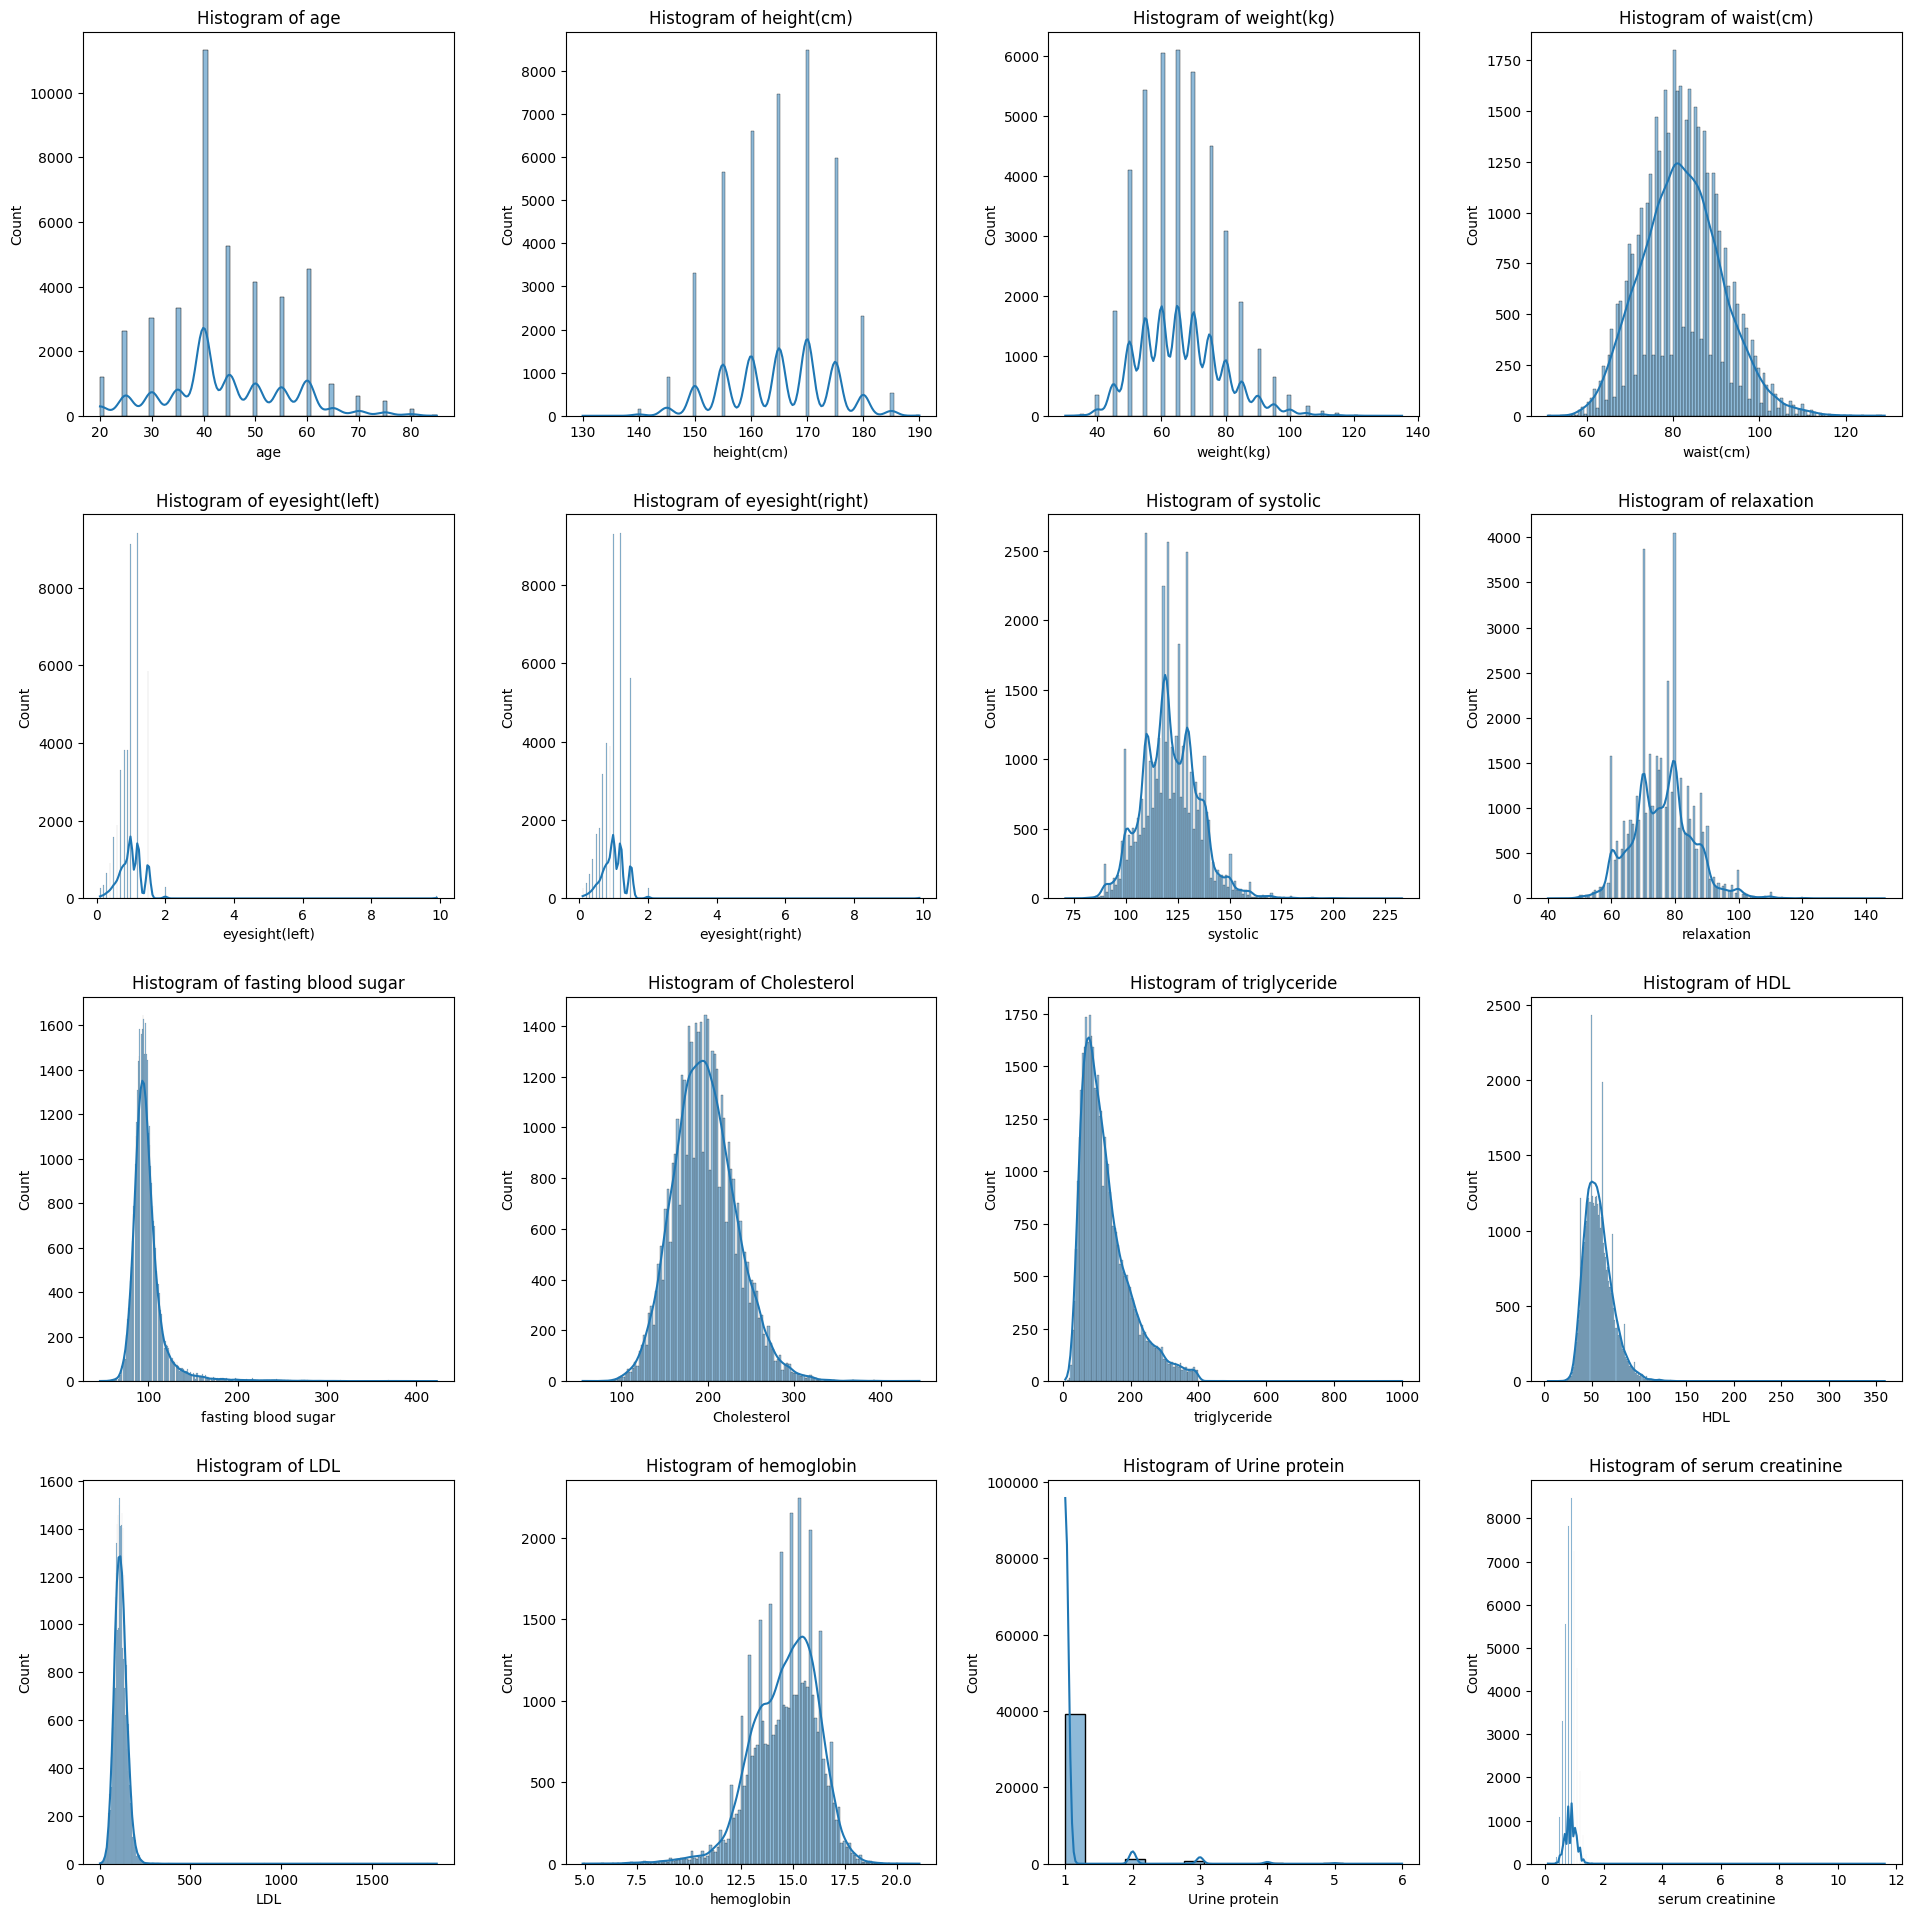

In [ ]:
# Non-Categorical Numeric Features Histograms
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(non_categorical_numeric_features):
    if i >= 16: break  # Only plot the first 16 features in a 4x4 grid
    ax = axes[i // 4, i % 4]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Hide any unused subplot areas
for j in range(i + 1, 16):
    axes[j // 4, j % 4].axis('off')

plt.show()

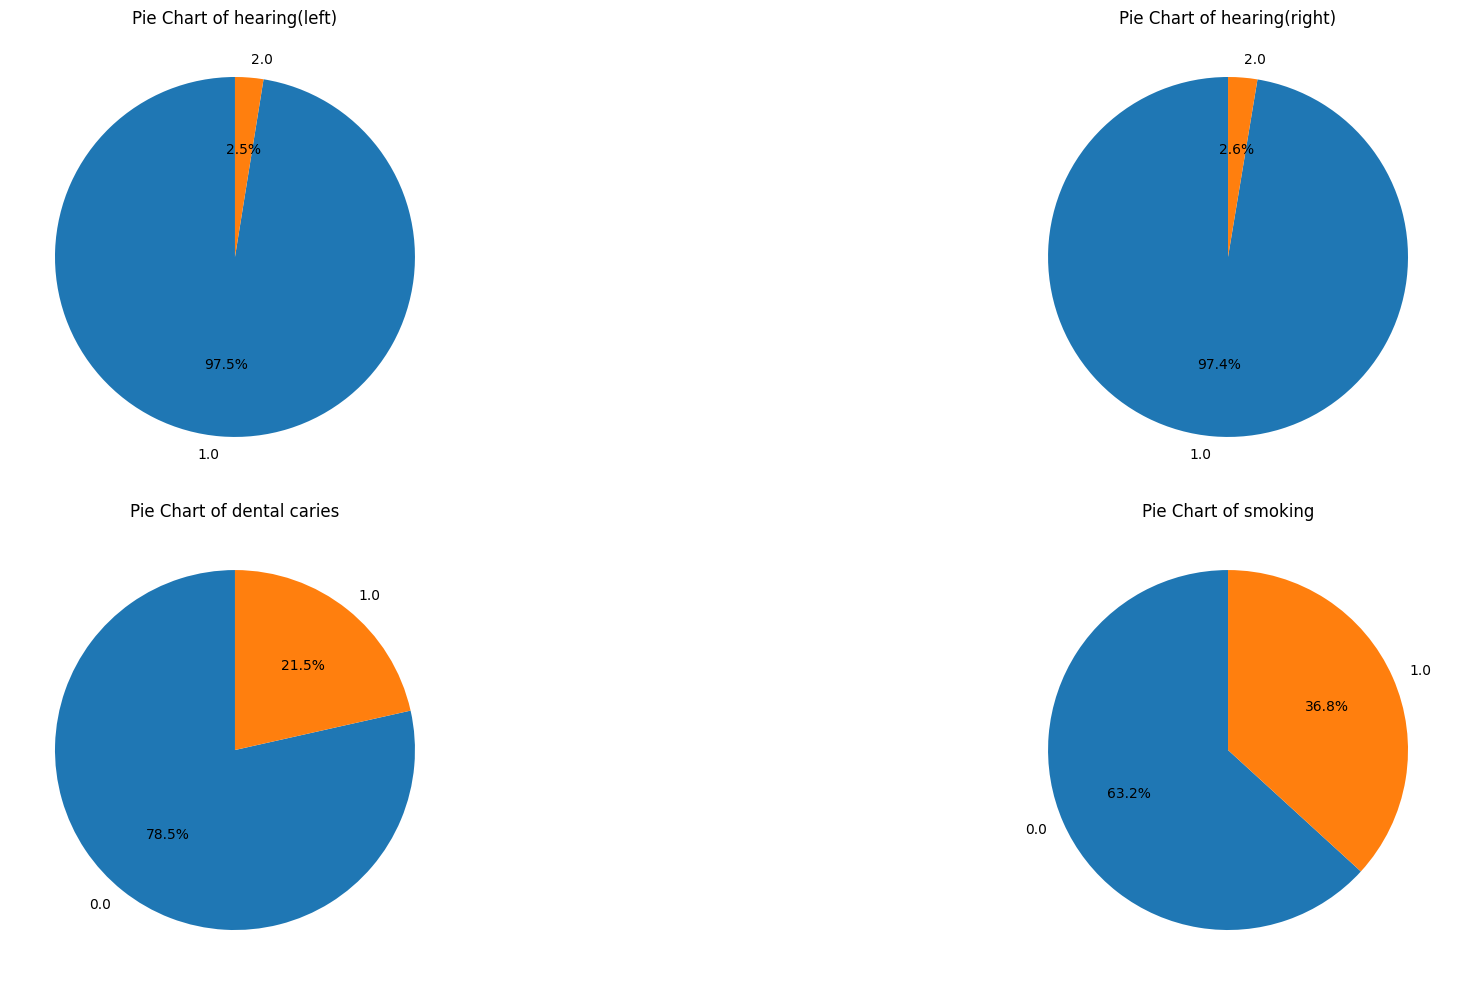

In [ ]:

# Update the grid layout for a 2x2 configuration
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # Adjust figsize as needed
fig.tight_layout(pad=1.0)

# Adjust loop to fill the 2x2 grid
for i, col in enumerate(categorical_numeric_features):
    if i >= 4:  # Break the loop if more than 4 features to fit in a 2x2 grid
        break
    ax = axes.flatten()[i]  # Flatten the axes array to easily index it
    values = df[col].value_counts()
    ax.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart of {col}')

# Hide any unused subplot areas if there are fewer than 4 categorical numeric features
for j in range(i + 1, 4):
    axes.flatten()[j].axis('off')

plt.show()


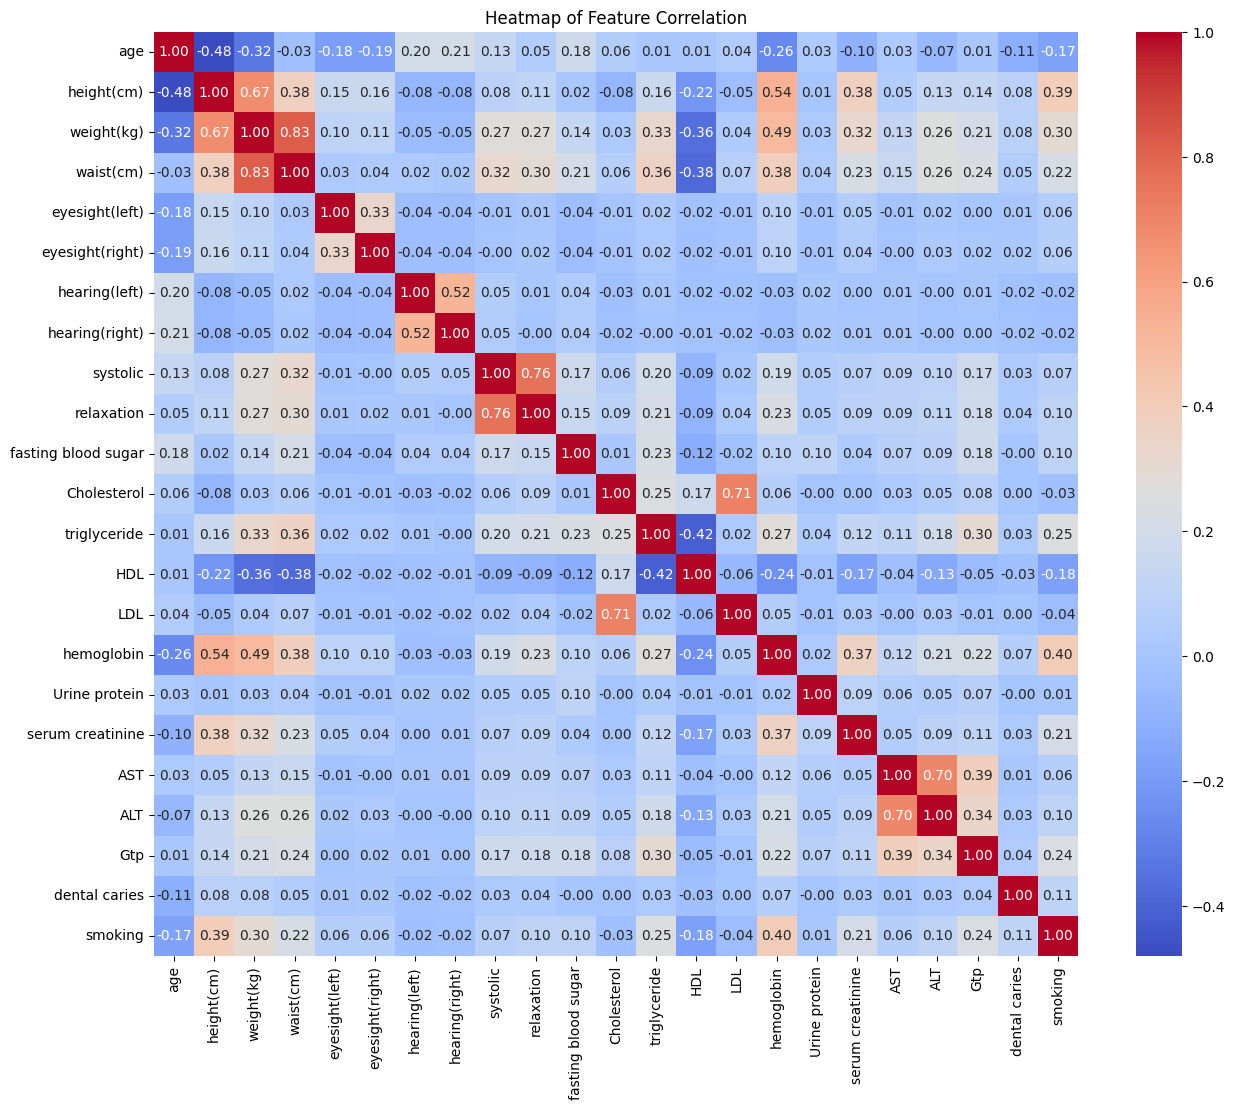

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title('Heatmap of Feature Correlation')
plt.show()

# **Data Cleaning and Preprocessing**

# Data cleaning

In [ ]:
# Drop rows where the last column has missing values
df = df.dropna(subset=[df.columns[-1]])

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()


In [ ]:
# Dropping duplicates
df = df.drop_duplicates()


In [ ]:
# Initialize imputers
iterative_imputer = IterativeImputer(max_iter=20)
knn_imputer = KNNImputer(n_neighbors=5)

# Separate dataframe into three groups
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
categorical_numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() <= 4]
non_categorical_numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 4]

In [ ]:
# Apply IterativeImputer to non-categorical numeric columns
imputed_non_categorical_numeric_cols = pd.DataFrame(iterative_imputer.fit_transform(non_categorical_numeric_cols),
                                                    columns=non_categorical_numeric_cols.columns,
                                                    index=non_categorical_numeric_cols.index)

# Apply KNNImputer to categorical numeric columns
imputed_categorical_numeric_cols = pd.DataFrame(knn_imputer.fit_transform(categorical_numeric_cols),
                                                columns=categorical_numeric_cols.columns,
                                                index=categorical_numeric_cols.index)

# Combine all columns back into a single dataframe, excluding the last column if it's the target variable
df = pd.concat([imputed_non_categorical_numeric_cols, imputed_categorical_numeric_cols], axis=1)

# Ensure the order of columns matches the original dataframe
df = df[df.columns]

In [ ]:
# Calculate the z-scores of all numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Establish a threshold for identifying an outlier
threshold = 3

# Remove outliers
df = df[(z_scores < threshold).all(axis=1)]

In [ ]:
print("Total rows after data cleaning: ",df.shape[0])

Total rows after data cleaning:  28892


# Data Preprocessing

In [ ]:

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Exclude columns that have a small number of unique values, which may indicate categorical data
threshold_unique_values = 4
non_categorical_numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > threshold_unique_values]

# Initialize the scaler
scaler = StandardScaler()

# Scale the non-categorical numeric columns
df_scaled = df.copy()
df_scaled[non_categorical_numeric_cols.columns] = scaler.fit_transform(non_categorical_numeric_cols)


# **Train-Test Split**

In [ ]:
# The last column is the target
X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report for Logistic Regression:

Training Set Performance
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79     14827
         1.0       0.64      0.55      0.59      8286

    accuracy                           0.73     23113
   macro avg       0.70      0.69      0.69     23113
weighted avg       0.72      0.73      0.72     23113


Test Set Performance
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80      3715
         1.0       0.64      0.57      0.60      2064

    accuracy                           0.73      5779
   macro avg       0.70      0.69      0.70      5779
weighted avg       0.72      0.73      0.72      5779

CV Accuracy for Logistic Regression: 0.73 ± 0.01
------------------------------------------------------------
Classification Report for Decision Tree:

Training Set Performance
              precision    recall  f1-score   support

         0.0       

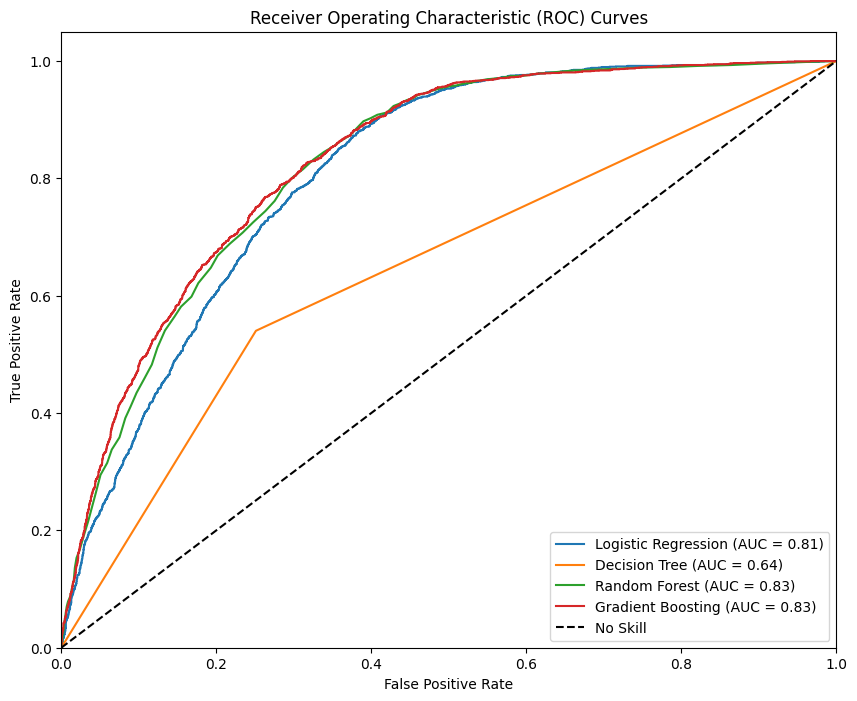

In [ ]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


# Prepare the plot for ROC curves
plt.figure(figsize=(10, 8))

# Train each model and evaluate on the test set
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the train set
    train_pred = model.predict(X_train)

    # Make predictions on the test set
    test_pred = model.predict(X_test)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate and print the classification report
    print(f"Classification Report for {name}:")
    print("\nTraining Set Performance")
    print(classification_report(y_train, train_pred))
    print("\nTest Set Performance")
    print(classification_report(y_test, test_pred))
    print(f"CV Accuracy for {name}: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    print("-"*60)


    if hasattr(model, "predict_proba"):
        # Predict probabilities for the test set
        y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

        # Compute ROC curve and area under the curve
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot baseline (no skill) classifier for comparison
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

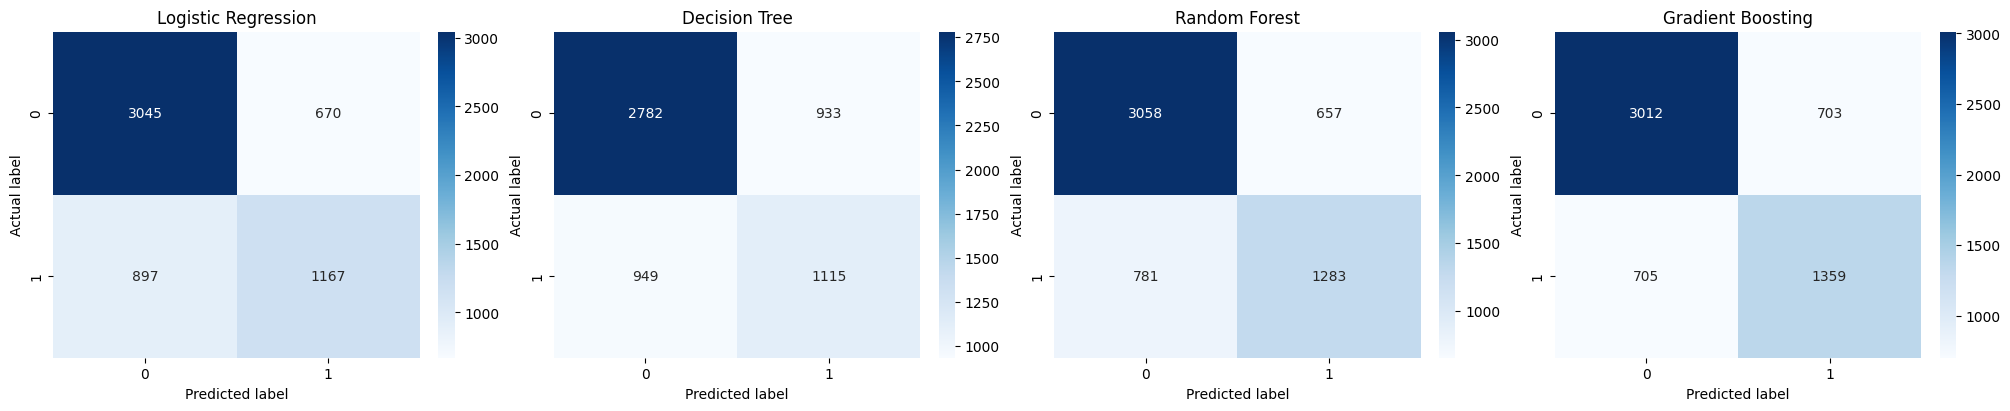

In [ ]:
# Prepare a grid for the confusion matrices
num_models = len(models)
fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 4), constrained_layout=True)

if num_models == 1:
    axes = [axes]  # Make it iterable for consistency

for ax, (name, model) in zip(axes, models.items()):
    # Predictions on the test set
    test_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, test_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')

# Display the plot
plt.show()

# **Hyperparameter Tuning**

In [ ]:
# Feature selection using RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_features_bool = selector.get_support()
selected_features_indices = np.where(selected_features_bool)[0]

# Map selected indices to feature names
selected_feature_names = X_train.columns[selected_features_indices]

print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['height(cm)', 'weight(kg)', 'waist(cm)', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'ALT',
       'Gtp'],
      dtype='object')


Processing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validation score (accuracy) for Logistic Regression: 0.7196
Test accuracy for Logistic Regression: 0.7197
Classification report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      3715
         1.0       0.62      0.55      0.58      2064

    accuracy                           0.72      5779
   macro avg       0.69      0.68      0.69      5779
weighted avg       0.71      0.72      0.72      5779

CV Accuracy for Gradient Boosting: 0.73 ± 0.01
Execution time for Logistic Regression: 2.12 seconds

Processing Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best cross-validation score (accuracy) for Decision Tree: 0.7083
Test accuracy for Decision Tree: 0.7174
Classification report for Decision Tree:
              precision    recall  f1-score   

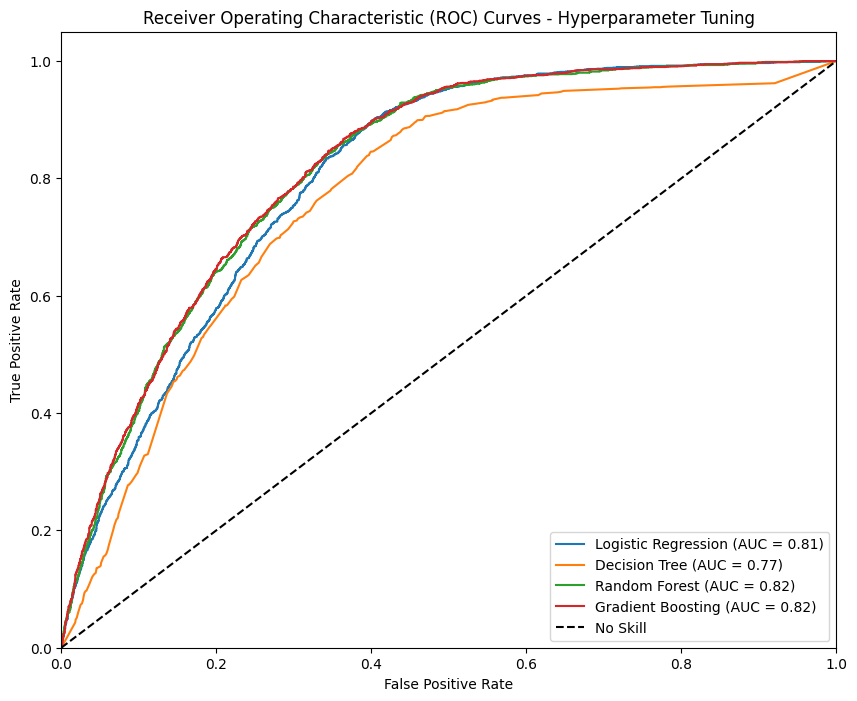

In [ ]:

# Define models and their parameter distributions
models_and_parameters = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        "C": np.logspace(-3, 3, 7),
        "solver": ["liblinear"]
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(), {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [100, 200]
    })
}

plt.figure(figsize=(10, 8))

for model_name, (model, params) in models_and_parameters.items():
    print(f"Processing {model_name}...")

    # Start timing
    start_time = time.time()

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_selected, y_train)

    # End timing
    end_time = time.time()
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score (accuracy) for {model_name}: {grid_search.best_score_:.4f}")

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Predict on the test set and evaluate
    y_pred = best_model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification report for {model_name}:\n{classification_report(y_test, y_pred)}")
    print(f"CV Accuracy for {name}: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    print(f"Execution time for {model_name}: {end_time - start_time:.2f} seconds\n")
    print("-"*40)

    # Plot ROC curve if model supports predict_proba
    if hasattr(best_model, "predict_proba"):
        y_probs = best_model.predict_proba(X_test_selected)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Hyperparameter Tuning')
plt.legend(loc="lower right")
plt.show()

# Conclusion


Based on the provided results, the Gradient Boosting model emerges as the best choice. It achieves the highest test accuracy (0.7451) among all models, indicating superior predictive performance on unseen data. Its best cross-validation score (accuracy) is also commendable at 0.7381, with a very tight confidence interval (0.75 ± 0.00), suggesting consistent performance across different subsets of the data. Furthermore, the model offers a good balance between precision and recall for both classes, as shown in the classification report, indicating effective handling of both majority and minority classes. While its execution time (160.59 seconds) is higher than Logistic Regression and Decision Tree, it is significantly more efficient than Random Forest and offers better accuracy, making it the most advantageous option in terms of both performance and computational efficiency.

Also, based on the drop in the model performances before and after feature selection suggests that the feature selection method is not the best option based on the dataset. As there are high dependency between variables, a multi-variate selection would be suitable.